In [1]:
import os
import pathlib
import parse_mom_sis_results as pmsr
import plot_pandas_data as ppd
import plot_right_axis_time as pra
from convert_time import days_to_gregorian_years, gregorian_years_to_days

In [2]:
log_basenames_025 = (
    "logfile.048x20.AVX2-REPRO.0.1m logfile.048x20.AVX2-REPRO.1.1m logfile.048x20.AVX2-REPRO.2.1m " + 
    "logfile.048x20.noht.AVX512.0.1m logfile.048x20.noht.AVX512.1.1m logfile.048x20.noht.AVX512.2.1m logfile.048x20.noht.AVX512.3.1m logfile.048x20.noht.AVX512.4.1m " +
    "logfile.048x20.noht.AVX512-REPRO.0.1m logfile.048x20.noht.AVX512-REPRO.1.1m logfile.048x20.noht.AVX512-REPRO.3.1m logfile.048x20.noht.AVX512-REPRO.4.1m logfile.048x20.noht.AVX512-REPRO.5.1m " +
    "logfile.048x40.AVX2-REPRO.0.1m logfile.048x40.AVX2-REPRO.1.1m logfile.048x40.AVX2-REPRO.2.1m " +
    "logfile.096x40.AVX2-REPRO.0.1m logfile.096x40.AVX2-REPRO.1.1m logfile.096x40.AVX2-REPRO.2.1m " + 
    "logfile.096x80.AVX2-REPRO.0.1m logfile.096x80.AVX2-REPRO.1.1m logfile.096x80.AVX2-REPRO.2.1m " +
    "logfile.192x80.AVX2-REPRO.2.1m logfile.192x80.AVX2-REPRO.3.1m logfile.192x80.AVX2-REPRO.4.1m " +
    "logfile.192x80.noht.AVX512.0.1m logfile.192x80.noht.AVX512.1.1m logfile.192x80.noht.AVX512.2.1m logfile.192x80.noht.AVX512.3.1m logfile.192x80.noht.AVX512.4.1m " +
    "logfile.192x80.noht.AVX512-REPRO.0.1m logfile.192x80.noht.AVX512-REPRO.1.1m logfile.192x80.noht.AVX512-REPRO.2.1m logfile.192x80.noht.AVX512-REPRO.3.1m"
)

In [3]:
log_basenames_01 = (
    "logfile.0.1.048x20.AVX512-REPRO.0.1d logfile.0.1.048x40.AVX512-REPRO.0.1d logfile.0.1.096x40.AVX512-REPRO.0.1d logfile.0.1.096x80.AVX512-REPRO.0.1d logfile.0.1.192x80.AVX512-REPRO.0.1d " + 
    "logfile.0.1.048x20.AVX512-REPRO.1.1d logfile.0.1.048x40.AVX512-REPRO.1.1d logfile.0.1.096x40.AVX512-REPRO.1.1d logfile.0.1.096x80.AVX512-REPRO.1.1d logfile.0.1.192x80.AVX512-REPRO.1.1d " +
    "logfile.0.1.048x20.AVX512-REPRO.2.1d logfile.0.1.048x40.AVX512-REPRO.2.1d logfile.0.1.096x40.AVX512-REPRO.2.1d logfile.0.1.096x80.AVX512-REPRO.2.1d logfile.0.1.192x80.AVX512-REPRO.2.1d"
)

In [4]:
mom_sis_work_dir = pathlib.PurePath("../access-om2/mom-sis/src/mom/work/")
log_dirname_025 = os.path.join(mom_sis_work_dir,"global_0.25_degree_NYF","logs.1m")
log_dirname_01 = os.path.join(mom_sis_work_dir,"global_0.1_degree","logs.1d")

In [5]:
logfiles_025 = [os.path.join(log_dirname_025, basename) for basename in log_basenames_025.split()]
logfiles_01 = [os.path.join(log_dirname_01, basename) for basename in log_basenames_01.split()]

In [6]:
df_025 = pmsr.parse_all(logfiles_025)
df_01 = pmsr.parse_all(logfiles_01)

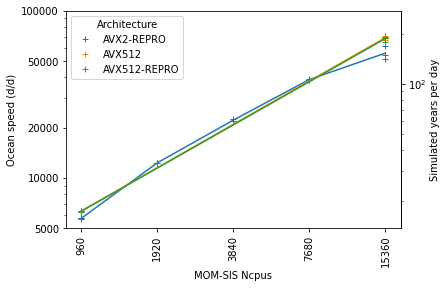

In [7]:
ppd.loglog_by_group("ncpus", "Ocean speed", 
    by="arch", 
    data=df_025,
    xlabel="MOM-SIS Ncpus",
    ylabel="Ocean speed (d/d)",
    yticks = [5000,10000,20000,50000,100000],
    right_yticks=[10,20,50,100,200],                
    right_axis_fn=pra.plot_right_axis_yd,
    legend_title="Architecture")

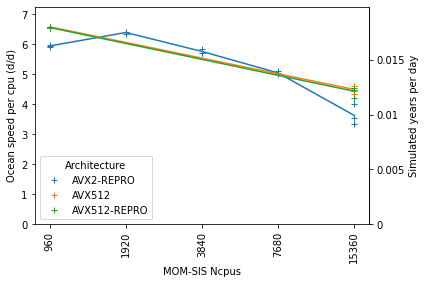

In [8]:
ppd.semilogx_by_group("ncpus", "Ocean speed per cpu", 
    by="arch", 
    data=df_025,
    xlabel="MOM-SIS Ncpus",
    ylabel="Ocean speed per cpu (d/d)",
    yticks=range(8),
    right_yticks=[n/200.0 for n in range(4)],
    right_axis_fn=pra.plot_right_axis_yd,
    legend_title="Architecture")

In [9]:
mean_025_speed=dict()
group_025_arch=df_025.groupby("arch")
for name, group in group_025_arch:
    means = group.groupby("ncpus")["Ocean speed"].mean()
    mean_025_speed[name] = means
speed_lo = mean_025_speed["AVX512-REPRO"][960] / mean_025_speed["AVX2-REPRO"][960]
speed_hi = mean_025_speed["AVX512-REPRO"][15360] / mean_025_speed["AVX2-REPRO"][15360]
print(round(speed_lo,2), round(days_to_gregorian_years(speed_lo),4))
print(round(speed_hi,2), round(days_to_gregorian_years(speed_hi),4))

1.1 0.003
1.22 0.0033


In [10]:
xticks_025 = df_025["ncpus"].sort_values().unique() 
xticks_01 = df_01["ncpus"].sort_values().unique()

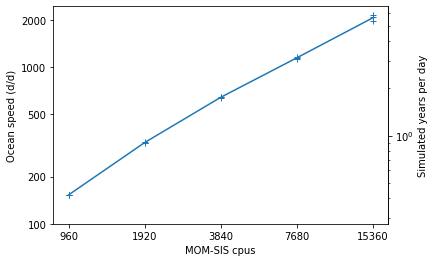

In [11]:
ppd.loglog("ncpus","Ocean speed",
    data=df_01,
    xlabel="MOM-SIS cpus",
    ylabel="Ocean speed (d/d)",
    xticks=xticks_01,
    yticks=[100,200,500,1000,2000],
    right_yticks=[0.5,1,2,5,10],
    right_axis_fn=pra.plot_right_axis_yd)

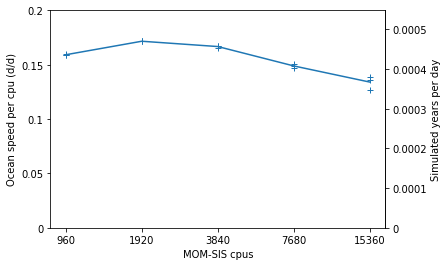

In [12]:
ppd.semilogx("ncpus","Ocean speed per cpu",
    data=df_01,
    xlabel="MOM-SIS cpus",
    ylabel="Ocean speed per cpu (d/d)",
    xticks=xticks_01,
    yticks=[n/20.0 for n in range(5)],
    right_yticks=[n/10000.0 for n in range(6)],
    right_axis_fn=pra.plot_right_axis_yd)

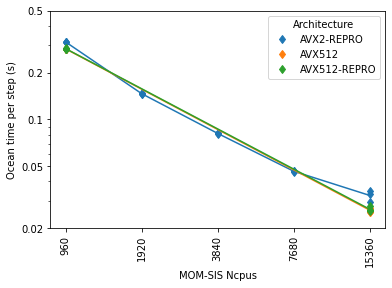

In [13]:
ppd.loglog_by_group("ncpus","ocean_time_per_step",
    by="arch",
    data=df_025,
    xlabel="MOM-SIS Ncpus",
    ylabel="Ocean time per step (s)",
    yticks=[0.02,0.05,0.1,0.2,0.5],
    right_yticks=[],
    right_axis_fn=pra.no_right_axis,
    legend_title="Architecture",
    marker='d')

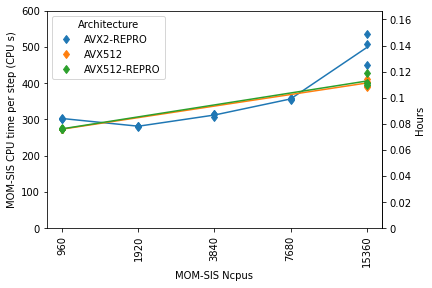

In [14]:
ppd.semilogx_by_group("ncpus","ocean_cpu_time_per_step",
    by="arch",
    data=df_025,
    xlabel="MOM-SIS Ncpus",
    ylabel="MOM-SIS CPU time per step (CPU s)",
    yticks=[100.0 * n for n in range(7)],
    right_yticks=[n/50.0 for n in range(9)],
    right_axis_fn=pra.plot_right_axis_sh,
    legend_title="Architecture",
    marker='d')

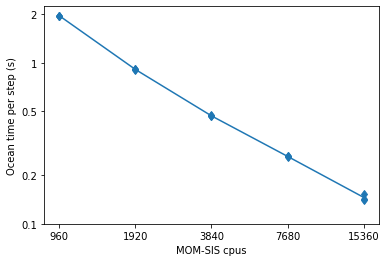

In [15]:
ppd.loglog("ncpus","ocean_time_per_step",
    data=df_01,
    xlabel="MOM-SIS cpus",
    ylabel="Ocean time per step (s)",
    xticks=xticks_01,
    yticks=[0.1,0.2,0.5,1.0,2.0],
    right_yticks=[],
    right_axis_fn=pra.no_right_axis,
    marker='d')

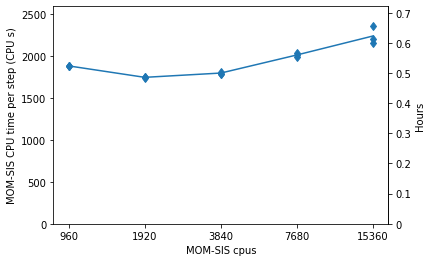

In [16]:
ppd.semilogx("ncpus","ocean_cpu_time_per_step",
    data=df_01,
    xlabel="MOM-SIS cpus",
    ylabel="MOM-SIS CPU time per step (CPU s)",
    xticks=xticks_01,
    yticks=[500.0 * n for n in range(6)],
    right_yticks=[n/10.0 for n in range(8)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='d')             

In [17]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [18]:
df_025

,arch,exp_seconds,seconds_per_time_step,nbr_time_steps,rows,cols,ncpus,Total runtime,Initialization,mpp_read,mpp_write,mpp_open,mpp_close,Init: atmos_model_init,Init: land_model_init,Init: ice_model_init,Init: ocean_model_init,Init: flux_exchange_init,Main loop,Termination,Ice,Ice: bot to top,Ice: update slow (dn),Ice: slow: conservation check,Ice: slow: dynamics,slow: ice_dynamics,slow: comm/cut check,slow: diags,Ice: slow: thermodynamics,Ice: slow: restore/limit,Ice: slow: salt to ocean,Ice: slow: thermodyn diags,Ice: update fast,Ocean,(Ocean initialization),(Ocean ODA),(Ocean advection velocity),(Ocean density diag),(Ocean update density),(Ocean vertical mixing coeff),(Ocean neutral physics),(Ocean submesoscale restrat),(Ocean shortwave),(Ocean sponges_eta),(Ocean sponges_tracer),(Ocean sponges_velocity),(Ocean xlandinsert),(Ocean xlandmix),(Ocean rivermix),(Ocean overexchange),(Ocean mixdownslope),(Ocean blob update),(Ocean blob cell update),(Ocean blob diagnose depth),(Ocean overflow),(Ocean overflow_OFP),(Ocean sigma transport),(Ocean tracer update),(Ocean surface flux),(Ocean bottom flux),(Ocean restoring flux),(Ocean TPM source),(Ocean TPM bbc),(Ocean TPM tracer),(Ocean explicit accel_a),(Ocean explicit accel_b),(Ocean implicit accel),(Ocean eta and pbot tendency),(Ocean eta and pbot update),(Ocean eta and pbot diagnose),(Ocean rho_dzt tendency),(Ocean dzt_dst update),(Ocean surface height smooth),(Ocean bottom pressure smooth),(Ocean mass forcing),(Ocean barotropic forcing),(Ocean barotropic dynamics),(Ocean velocity update),(Ocean diagnostics),(Ocean update T-cell thickness),(Ocean update Total thickness),(Ocean update L sys. thickness),(Ocean update E sys. thickness),(Ocean update U-cell thickness),(Ocean tracer halo updates),(Ocean velocity halo update),(Ocean sum ocean surface),(Ocean average state),(Ocean tracer tmask limit),(Ocean gotm: advection),(Ocean increment eta),(Ocean increment tracer),(Ocean increment velocity),(Ocean update rho_salinity),(Ocean idealized surface waves),(Ocean open boundaries),(Ocean tracer: bih tracer),(Ocean tracer: lap tracer),(Ocean tracer: vert diffuse),(Ocean tracer: vert diffuse impl,(Ocean tracer: advection),(Ocean tracer: frazil),(Ocean tracer: convection),(Ocean tracer: Lagrangian blobs),(Ocean tracer: implicit blobs),(Ocean tracer: adjust the L thic,(Ocean tracer: adjust the E thic,(Ocean CT2PT: 1),(Ocean CT2PT: 2),(Ocean CT2PT: 3),(Ocean vmix: constant),(Ocean vmix: PPvmix),(Ocean vmix: KPP_test),(Ocean vmix: KPP_mom4p0),(Ocean vmix: KPP_mom4p1),(Ocean vmix: chenvmix),(Ocean vmix: gotmvmix),(Ocean vmix: tidal),(Ocean vmix: watermass_diag),(Ocean const lap frict),(Ocean general lap frict),(Ocean C-grid lap frict),(Ocean const bih frict),(Ocean general bih frict),(Ocean c-grid bih frict),(Ocean advect: horz 4th),(Ocean advect: vert 4th),(Ocean advect: horz 6th),(Ocean advect: vert 6th),(Ocean advect: horz quk),(Ocean advect: vert quk),(Ocean advect: horz qukmom3),(Ocean advect: vert qukmom3),(Ocean advect: MDFL-sup-b),(Ocean advect: MDFL-sweby),(Ocean advect: MDFL-sweby-all),(Ocean advect: MDFL-sweby-test),(Ocean advect: DST-linear),(Ocean advect: DST-linear-test),(Ocean advect: MDFL-sweby-mpi),(Ocean advect: MDFL-sweby-cuk),(Ocean advect: MDFL-sweby-cui),(Ocean advect: MDFL-sweby-cuj),(Ocean advect: MDFL-sweby-diag),(Ocean advect: MDPPM),(Ocean advect: MDPPM-TEST),(Ocean advect: psom total),(Ocean psom advect: psom_x),(Ocean psom advect: psom_y),(Ocean psom advect: psom_z),(Ocean advect: MDMDT-TEST),(Ocean advect: horz up),(Ocean advect: vert up),(Ocean advect: horz 2nd),(Ocean advect: vert 2nd),(Ocean advect: gyre_overturn),(Ocean advect: advect diss),(Ocean shortwave morel pen),(Ocean shortwave morel pen-mom4p,(Ocean_OFP_init),(Ocean_OFP_main),(ocean_OFP_update_1),(ocean_OFP_update_2),(ocean_OFP_update_3),(Ocean diagnostics: adv_vel),(Ocean diagnostics: tracer),(Ocean diagnostics: velocity),(Ocean adv_vel_diag: numerics),(Ocean adv_vel_diag: s-trans),(Ocean adv_vel_diag: rh

In [19]:
df_01

,arch,exp_seconds,seconds_per_time_step,nbr_time_steps,rows,cols,ncpus,Total runtime,Initialization,mpp_read,mpp_write,mpp_open,mpp_close,Init: atmos_model_init,Init: land_model_init,Init: ice_model_init,Init: ocean_model_init,Init: flux_exchange_init,Main loop,Termination,Ice,Ice: bot to top,Ice: update slow (dn),Ice: slow: conservation check,Ice: slow: dynamics,slow: ice_dynamics,slow: comm/cut check,slow: diags,Ice: slow: thermodynamics,Ice: slow: restore/limit,Ice: slow: salt to ocean,Ice: slow: thermodyn diags,Ice: update fast,Ocean,(Ocean initialization),(Ocean ODA),(Ocean advection velocity),(Ocean density diag),(Ocean update density),(Ocean vertical mixing coeff),(Ocean neutral physics),(Ocean submesoscale restrat),(Ocean shortwave),(Ocean sponges_eta),(Ocean sponges_tracer),(Ocean sponges_velocity),(Ocean xlandinsert),(Ocean xlandmix),(Ocean rivermix),(Ocean overexchange),(Ocean mixdownslope),(Ocean blob update),(Ocean blob cell update),(Ocean blob diagnose depth),(Ocean overflow),(Ocean overflow_OFP),(Ocean sigma transport),(Ocean tracer update),(Ocean surface flux),(Ocean bottom flux),(Ocean restoring flux),(Ocean TPM source),(Ocean TPM bbc),(Ocean TPM tracer),(Ocean explicit accel_a),(Ocean explicit accel_b),(Ocean implicit accel),(Ocean eta and pbot tendency),(Ocean eta and pbot update),(Ocean eta and pbot diagnose),(Ocean rho_dzt tendency),(Ocean dzt_dst update),(Ocean surface height smooth),(Ocean bottom pressure smooth),(Ocean mass forcing),(Ocean barotropic forcing),(Ocean barotropic dynamics),(Ocean velocity update),(Ocean diagnostics),(Ocean update T-cell thickness),(Ocean update Total thickness),(Ocean update L sys. thickness),(Ocean update E sys. thickness),(Ocean update U-cell thickness),(Ocean tracer halo updates),(Ocean velocity halo update),(Ocean sum ocean surface),(Ocean average state),(Ocean tracer tmask limit),(Ocean gotm: advection),(Ocean increment eta),(Ocean increment tracer),(Ocean increment velocity),(Ocean update rho_salinity),(Ocean idealized surface waves),(Ocean open boundaries),(Ocean tracer: bih tracer),(Ocean tracer: lap tracer),(Ocean tracer: vert diffuse),(Ocean tracer: vert diffuse impl,(Ocean tracer: advection),(Ocean tracer: frazil),(Ocean tracer: convection),(Ocean tracer: Lagrangian blobs),(Ocean tracer: implicit blobs),(Ocean tracer: adjust the L thic,(Ocean tracer: adjust the E thic,(Ocean CT2PT: 1),(Ocean CT2PT: 2),(Ocean CT2PT: 3),(Ocean vmix: constant),(Ocean vmix: PPvmix),(Ocean vmix: KPP_test),(Ocean vmix: KPP_mom4p0),(Ocean vmix: KPP_mom4p1),(Ocean vmix: chenvmix),(Ocean vmix: gotmvmix),(Ocean vmix: tidal),(Ocean vmix: watermass_diag),(Ocean const lap frict),(Ocean general lap frict),(Ocean C-grid lap frict),(Ocean const bih frict),(Ocean general bih frict),(Ocean c-grid bih frict),(Ocean advect: horz 4th),(Ocean advect: vert 4th),(Ocean advect: horz 6th),(Ocean advect: vert 6th),(Ocean advect: horz quk),(Ocean advect: vert quk),(Ocean advect: horz qukmom3),(Ocean advect: vert qukmom3),(Ocean advect: MDFL-sup-b),(Ocean advect: MDFL-sweby),(Ocean advect: MDFL-sweby-all),(Ocean advect: MDFL-sweby-test),(Ocean advect: DST-linear),(Ocean advect: DST-linear-test),(Ocean advect: MDFL-sweby-mpi),(Ocean advect: MDFL-sweby-cuk),(Ocean advect: MDFL-sweby-cui),(Ocean advect: MDFL-sweby-cuj),(Ocean advect: MDFL-sweby-diag),(Ocean advect: MDPPM),(Ocean advect: MDPPM-TEST),(Ocean advect: psom total),(Ocean psom advect: psom_x),(Ocean psom advect: psom_y),(Ocean psom advect: psom_z),(Ocean advect: MDMDT-TEST),(Ocean advect: horz up),(Ocean advect: vert up),(Ocean advect: horz 2nd),(Ocean advect: vert 2nd),(Ocean advect: gyre_overturn),(Ocean advect: advect diss),(Ocean shortwave morel pen),(Ocean shortwave morel pen-mom4p,(Ocean_OFP_init),(Ocean_OFP_main),(ocean_OFP_update_1),(ocean_OFP_update_2),(ocean_OFP_update_3),(Ocean diagnostics: adv_vel),(Ocean diagnostics: tracer),(Ocean diagnostics: velocity),(Ocean adv_vel_diag: numerics),(Ocean adv_vel_diag: s-trans),(Ocean adv_vel_diag: rh